# Pole positions for the COMPASS resonances
Misha Mikhasenko, HISKP, Universität Bonn

 * Big mass-dependent fit of 13 major waves in the 3pi data set have been performed and about to be published.
 * The Breit-Wigner parameters have been extracted. Amplitude which have been used in the analysis are analytical functions of the invariant mass square $s$, therefore analytical continuation to the complex plane makes sence.
 
 ##### => Using analyticity we can extract poles

### COMPASS Breit-Wigner parameters

![Resonances parameters aj measered by COMPASS](./ajs.png)

![Resonances parameters pij measered by COMPASS](./pijs.png)

### Signal and Backgound
The amplitudes are sums of the resonance amplitudes (parametrized via Breit-Wigner formula) and nonresonant background
$$
A(s) = C_j D^{R}_j(s) + C_0 D^{\text{NR}}(s)
$$
where $C_j$ are complex coefficients, 
$D^{R}_j(s)$ is the dynamical amplitude for resonances,
$D^{\text{NR}}$ is the nonresonant background
$$
 D^{R}_j(s) = \frac{m_j \Gamma_j}{m_j^2-s-im_j \Gamma_j},\qquad
 D^{\text{NR}}(s) = \bigg[\frac{\sqrt{s}-0.5}{0.5}\bigg] \exp(-c(t)\tilde{q}^2(s)).
$$
#### The singularities of the sum are composition of the singularities of the terms in the sum.
 * Background is in the form: polynomial*exponent does not have any poles, but has essential singularity at $\infty$
 * The Breit-Wigner amplitude has a resonant pole at the complex plane when the denominator vanishes.

$s_p = (m_p+i\Gamma_p/2)^2$

### Most of resonances: width does not depend on energy

The Breit-Wigner amplitude with the constant width reads (Eq. 21)
$$
BW = \frac{m_j \Gamma_j}{m_j^2-s-i m_j \Gamma_j}
$$
the pole position is found to be $s_p = (m_j^2-im_j\Gamma_j)$

The standard procedure to find the mass and width parameters of the pole is $s_p = (m_\text{p}-i\Gamma_\text{p}/2)^2$.
Therefore, they are a little bit different to BW parameters.

In [1]:
function mΓpole(mBW,ΓBW)
    rep,imp = reim(sqrt(mBW^2-1im*mBW*ΓBW))
    rep, -2*imp
end

mΓpole (generic function with 1 method)

In [2]:
# results the COMPASS fit
const ma2=1.3145; const Γa2=0.1066;
const ma1=1.299; const Γa1=0.380;

# simply parameterized a1 resonances
d = Dict()
# aJ resonances
d["a1(1420)"] = (1410.5, 160.6)
d["a1(1640)"] = (1699.9, 506.8)
d["a2(1700)"] = (1681.3, 436.2)
d["a4(2040)"] = (1935.1, 333.2)
# πJ resonances
d["π(1800)"]  = (1804.3, 220.5)
d["π1(1600)"] = (1603.7, 583.4)
d["π2(1670)"] = (1642.0, 311.1)
d["π2(1880)"] = (1846.6, 245.9)
d["π2(2005)"] = (1962.2, 370.9)
d

Dict{Any,Any} with 9 entries:
  "a4(2040)" => (1935.1, 333.2)
  "π2(2005)" => (1962.2, 370.9)
  "π(1800)"  => (1804.3, 220.5)
  "π2(1880)" => (1846.6, 245.9)
  "a1(1420)" => (1410.5, 160.6)
  "a1(1640)" => (1699.9, 506.8)
  "π1(1600)" => (1603.7, 583.4)
  "π2(1670)" => (1642.0, 311.1)
  "a2(1700)" => (1681.3, 436.2)

In [3]:
# header
print_head() = begin
    println(rpad("resonance:",20),
            rpad("(m_BW, Γ_BW)",20),
            " -> ",
            lpad("(m_pole, Γ_pole)",20))
    println(rpad("",63,"-"))
end
print_head()
# parameters
for (k,v) in sort(collect(d))
    (m,Γ) = mΓpole(v[1],v[2])
    println(rpad(k,20),
        rpad((v[1],v[2]),20),
        " -> ",
        lpad((signif(m,5),signif(Γ,4)),20))
end

resonance:          (m_BW, Γ_BW)         ->     (m_pole, Γ_pole)
---------------------------------------------------------------
a1(1420)            (1410.5, 160.6)      ->      (1412.8, 160.3)
a1(1640)            (1699.9, 506.8)      ->      (1718.3, 501.4)
a2(1700)            (1681.3, 436.2)      ->      (1695.2, 432.6)
a4(2040)            (1935.1, 333.2)      ->      (1942.2, 332.0)
π(1800)             (1804.3, 220.5)      ->      (1807.7, 220.1)
π1(1600)            (1603.7, 583.4)      ->      (1629.2, 574.3)
π2(1670)            (1642.0, 311.1)      ->      (1649.3, 309.7)
π2(1880)            (1846.6, 245.9)      ->      (1850.7, 245.4)
π2(2005)            (1962.2, 370.9)      ->      (1970.9, 369.3)


### Special $a_2(1320)$
The parameterization is given by Eq.(24).

\begin{equation*}
\Gamma(s) = \Gamma_0\frac{m_{a_2}}{\sqrt{s}}
\bigg[
    (1-x)\frac{q_{\rho\pi}(\sqrt{s})}{q_{\rho\pi}(m_{a_2})}\frac{F_2(R^2q_{\rho\pi}^2(\sqrt{s}))}{F_2(R^2q_{\rho\pi}^2(m_{a_{2}}))}
    +x\frac{q_{\eta\pi}(\sqrt{s})}{q_{\eta\pi}(m_{a_2})}\frac{F_2(R^2q_{\eta\pi}^2(\sqrt{s}))}{F_2(R^2q_{\eta\pi}^2(m_{a_{2}}))}
\bigg]
\end{equation*}
with the parameters:
 - the Blatt-Weisskopf barrier factor $F_2(z) = z^2/(9+3z+z^2)$
 - size parameter $R = 5\,$GeV$^{-1}$
 - branching fraction $x = 0.2$


In [4]:
const mπ=0.139; const mπ2=mπ^2;
# a2 parameterization
λ(x,y,z)=x^2+y^2+z^2-2*x*y-2*y*z-2*z*x;
function a2II(s)
    mρ=0.770; mρ2=mρ^2
    mη=0.547; mη2=mη^2
    # obtained parameters
    ma2sq=ma2^2
    # rho pi
    qρ=sqrt(λ(s,mρ2,mπ2)/(4s))
    qρ0=sqrt(λ(ma2sq,mρ2,mπ2)/(4ma2sq))
    Rsq = 5.0^2;
    # eta pi
    qη=sqrt(λ(s,mη2,mπ2)/(4s))
    qη0=sqrt(λ(ma2sq,mη2,mπ2)/(4ma2sq))
    # fraction
    xf = 0.2
    # barrier factors
    F2sq(z)=z^2/(9+3z+z^2)
    # enegry-dep. width
    Γ = Γa2*ma2/sqrt(s)*(
        (1-xf)*qρ/qρ0*F2sq(qρ^2*Rsq)/F2sq(qρ0^2*Rsq) +
           xf *qη/qη0*F2sq(qη^2*Rsq)/F2sq(qη0^2*Rsq) )
    ma2sq-s-1im*ma2*Γ
end

a2II (generic function with 1 method)

In [5]:
using Plots

### Plot of the inverse amplitude $a_{1320}(s)$ at the complex plane


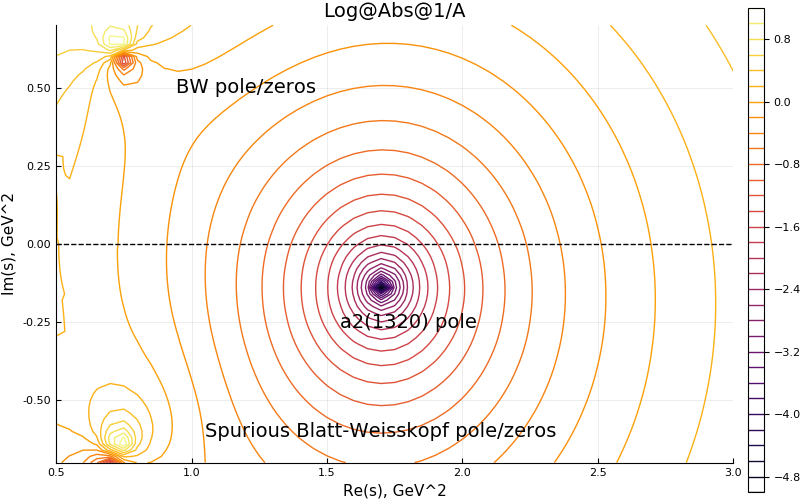

In [6]:
sx = 0.5:0.05:3.0
sy = -0.7:0.02:0.7
fss = [a2II(sr+1im*si) for si in sy, sr in sx]
contour(sx, sy, [log(abs(f)) for f in fss], levels=40,
    title="Log@Abs@1/A", xlab = "Re(s), GeV^2", ylab = "Im(s), GeV^2", size=(800,500))
annotate!(1.7 ,-0.6, "Spurious Blatt-Weisskopf pole/zeros")
annotate!(1.2 ,+0.5, "BW pole/zeros")
annotate!(1.8 ,-0.25,"a2(1320) pole")
hline!([0],lc=:black,label="",ls=:dash)

### $a_2(1320)$ pole position, exactly

In [7]:
using NLopt

In [8]:
a2II_abs(x::Vector, grad::Vector) = abs(a2II(x[1]+1im*x[2]))

# find minimum which of course suppose to be zero
opt = Opt(:LN_COBYLA, 2)
xtol_rel!(opt,1e-6)

min_objective!(opt, a2II_abs)

(minf,a2p,ret) = optimize(opt, [ma2^2, -ma2*Γa2])
println("got $minf at $a2p after $count iterations (returned $ret)")

got 1.0192193982644612e-5 at [1.70492, -0.137477] after count iterations (returned XTOL_REACHED)


In [9]:
(ma2pole,Γa2pole) = 
begin
    sp = a2p[1]+1im*a2p[2] # just by eye
    rep,imp = reim(sqrt(sp))
    rep,-2.*imp
end
print_head()
begin
        println(rpad("a2(1320)",20),
        rpad((ma2*1000,Γa2*1000),20),
        " -> ",
        lpad((signif(ma2pole*1000,5),signif(Γa2pole*1000,4)),20))
end

resonance:          (m_BW, Γ_BW)         ->     (m_pole, Γ_pole)
---------------------------------------------------------------
a2(1320)            (1314.5, 106.6)      ->      (1306.8, 105.2)


### Comparison to the pole from $\eta\pi$ analysis 
Recently published paper
![Resonances parameters aj measered by COMPASS](./eta-pi-2.png)

## $a_1(1260)$ the trickiest one
energy-dependent width involves quasi-two-body parameterization

To continue, I use non-symmetrized matrix element which makes it different to original COMPASS parameterization.
In the calculation below:
$$
\Gamma(s) = \Gamma_0 \frac{\rho(s)}{\rho(m_{a_1}^2)}\frac{m_{a_1}}{\sqrt{s}},\quad\text{where}\quad
\rho(s) = \int_{4m_\pi^2}^{(\sqrt{s}-m_\pi)^2} \frac{\mathrm{d}s_1}{2\pi} U_\rho(s)
\frac{1}{8\pi} \frac{\lambda^{1/2}(s,s_1,m_\pi^2)}{s}
$$

the function $U(s_1)$ is a given of rho meson line shape $U(s_1) = \big|\,f_\rho(s_1)\big|^2 (1-4m_\pi^2/s_1)^{1/2}$

In [ ]:
using QuadGK

In [ ]:
const mπ=0.139; const mπ2=mπ^2;

In [ ]:
ρ(s,m1sq,m2sq)=1/(8*π)*sqrt(λ(s,m1sq,m2sq))/s
# arbitrary normalization 
function Uρ(s)
    mρ=0.7685; mρ2=mρ^2 # mass.indep paper
    # Break-up momentum
    p = sqrt(λ(s,mπ2,mπ2)/(4*s))
    p0 = sqrt(λ(mρ2,mπ2,mπ2)/(4*mρ2))
    # Blatt-Weisskopf stuff
    R = 5  # GeV^-1
    F = 1./(1./R^2+p^2)
    F0 = 1./(1./R^2+p0^2)
    # FF
    BWs = p^2*F/(p0^2*F0)
    # Energy dependent width
    Γ0 = 0.1507;
    Γ = Γ0*(p/p0)*mρ/sqrt(s)*BWs
    return BWs/((mρ^2-s)^2+mρ^2*Γ^2)
end

In [ ]:
using QuadGK

In [ ]:
# complex agrument
ρ(s::Complex{Float64}) = 1/(8*π*s)/(2π)*begin
    s_f = (sqrt(s)-mπ)^2 # final piont
    s_m = real(s_f)+1.0im*imag(s_f)/100; # point in the middle
    integrand = s1->begin
        sqrt(λ(s,s1,mπ^2))*Uρ(s1)*sqrt(λ(s1,mπ2,mπ2))/(8*π*s1)
    end
    int1 = quadgk(integrand, 4*mπ2, s_m)[1]
    int2 = quadgk(integrand, s_m, s_f)[1]
    int1+int2
end

In [ ]:
function a1II(s::Complex{Float64},m0,Γ0)
    Γ = Γ0*m0/sqrt(s)*ρ(s)/ρ(m0^2+1e-5im)
    m0^2-s-1im*m0*Γ
end

### Plot of the inverse amplitude $a_{{1260}}(s)$ at the complex plane
The pole is indicated by the blue spot at the `Log@Abs@Inverse`-plot

In [ ]:
sx = 0.5:0.05:3.0
sy = -0.8:0.02:0.8
fss = [a1II(sr+1im*si,ma1,Γa1) for si in sy, sr in sx]
contour(sx, sy, [log(abs(f)) for f in fss], levels=40,
    title="Log@Abs@1/A", xlab = "Re(s), GeV^2", ylab = "Im(s), GeV^2", size=(800,500))
annotate!(1.2 ,-0.2,"Rho-Pi cut")
annotate!(1.2 , 0.2,"Rho-Pi cut")
annotate!(1.8 ,-0.65,"a1(1260) pole")
hline!([0],lc=:black,label="",ls=:dash)

### $a_1(1260)$ pole position, exactly

In [ ]:
a1II_abs(x::Vector, grad::Vector) = abs(a1II(x[1]+1im*x[2],ma1,Γa1))

# find minimum which of course suppose to be zero
opt1 = Opt(:LN_COBYLA, 2)
xtol_rel!(opt1,1e-6)

min_objective!(opt1, a1II_abs)

(minf,a1p,ret) = optimize(opt1, [ma1^2, -ma1*Γa1])
println("got $minf at $a1p after $count iterations (returned $ret)")

In [ ]:
(ma1pole,Γa1pole) = 
begin
    sp = a1p[1]+1im*a1p[2]
    rep,imp = reim(sqrt(sp))
    rep,-2.*imp
end
print_head()
begin
        println(rpad("a1(1260)",20),
        rpad((ma1,Γa1),20),
        " -> ",
        lpad((round(ma1pole,3),round(Γa1pole,3)),20))
end